In [77]:
# Import Dependencies

from bs4 import BeautifulSoup
import requests
import pandas as pd
import os
from splinter import Browser
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
import json


import time
import warnings
warnings.filterwarnings('ignore')

import requests
import shutil
from IPython.display import Image

In [78]:
#pointing to the directory where chromedriver exists
executable_path = {'executable_path': '/usr/local/bin/chromedriver'}
browser = Browser("chrome", **executable_path, headless = False)

# Latest Mars News

In [13]:
# Visit Nasa news url

url = "https://mars.nasa.gov/news/"
browser.visit(url)
time.sleep(5)

In [14]:
# HTML Object
html = browser.html

# Parse HTML with Beautiful Soup
soup = BeautifulSoup(html, 'html.parser')

In [15]:
# Retrieve article containing latest information

article = soup.find("div", class_='list_text')
article

<div class="list_text"><div class="list_date">August 13, 2020</div><div class="content_title"><a href="/news/8736/nasas-ingenuity-mars-helicopter-recharges-its-batteries-in-flight/" target="_self">NASA's Ingenuity Mars Helicopter Recharges Its Batteries in Flight</a></div><div class="article_teaser_body">Headed to the Red Planet with the Perseverance rover, the pioneering helicopter is powered up for the first time in interplanetary space as part of a systems check.</div></div>

In [16]:
# Retrieve the latest element that contains news title and news_paragraph
news_title = article.find("div", class_="content_title").text
news_p = article.find("div", class_ ="article_teaser_body").text

# Display scrapped data 
print(news_title)
print(news_p)

NASA's Ingenuity Mars Helicopter Recharges Its Batteries in Flight
Headed to the Red Planet with the Perseverance rover, the pioneering helicopter is powered up for the first time in interplanetary space as part of a systems check.


# Featured Mars Image

In [17]:
# Visit JPL Featured Space Image url 

url = 'https://www.jpl.nasa.gov/spaceimages/?search=&category=Mars'
browser.visit(url)

In [18]:
# Click on "FULL IMAGE" button

browser.click_link_by_partial_text('FULL IMAGE')
time.sleep(5)

In [19]:
# Click on "more info" button

browser.click_link_by_partial_text('more info')
time.sleep(5)

In [20]:
# HTML Object
html_image = browser.html

# Parse HTML with Beautiful Soup
image_soup = BeautifulSoup(html_image, 'html.parser')

In [21]:
# image = image_soup.find('section', class_='content_page module')


In [22]:
# Retrieve image url

image_url = image_soup.find('img', class_='main_image')['src']
image_url

'/spaceimages/images/largesize/PIA16763_hires.jpg'

In [23]:
# Obtain complete featured image url

featured_image_url = 'https://www.jpl.nasa.gov' + image_url
print(featured_image_url)

https://www.jpl.nasa.gov/spaceimages/images/largesize/PIA16763_hires.jpg


In [24]:
# Opening featured image url

response = requests.get(featured_image_url, stream=True)
with open('featured_image.png', 'wb') as out_file:
    shutil.copyfileobj(response.raw, out_file)

In [25]:
# Saving the featured image

Image(url='featured_image.png')

# Latest information from Twitter account

In [51]:
# Visit Mars twitter page

url = 'https://twitter.com/marswxreport?lang=en'
browser.visit(url)
time.sleep(5)

In [52]:
# HTML Object
html_tweet = browser.html

# Parse HTML with Beautiful Soup
tweet_soup = BeautifulSoup(html_tweet, 'html.parser')
time.sleep(5)
# tweet_soup

In [53]:
# Find all tweets

twitter = tweet_soup.find_all('div', lang='en')
time.sleep(5)
twitter
# twitter[0].text

[<div class="css-901oao r-jwli3a r-1qd0xha r-a023e6 r-16dba41 r-ad9z0x r-bcqeeo r-bnwqim r-qvutc0" dir="auto" lang="en"><span class="css-901oao css-16my406 r-1qd0xha r-ad9z0x r-bcqeeo r-qvutc0">InSight sol 608 (2020-08-11) low -93.0ºC (-135.5ºF) high -19.5ºC (-3.1ºF)
 winds from the WNW at 8.5 m/s (19.0 mph) gusting to 23.8 m/s (53.3 mph)
 pressure at 7.90 hPa</span></div>,
 <div class="css-901oao r-jwli3a r-1qd0xha r-a023e6 r-16dba41 r-ad9z0x r-bcqeeo r-bnwqim r-qvutc0" dir="auto" lang="en"><span class="css-901oao css-16my406 r-1qd0xha r-ad9z0x r-bcqeeo r-qvutc0">InSight sol 607 (2020-08-11) low -93.1ºC (-135.6ºF) high -18.9ºC (-2.1ºF)
 winds from the WNW at 8.2 m/s (18.4 mph) gusting to 21.4 m/s (47.8 mph)
 pressure at 7.90 hPa</span></div>,
 <div class="css-901oao r-jwli3a r-1qd0xha r-a023e6 r-16dba41 r-ad9z0x r-bcqeeo r-bnwqim r-qvutc0" dir="auto" lang="en"><span class="css-901oao css-16my406 r-1qd0xha r-ad9z0x r-bcqeeo r-qvutc0">InSight sol 606 (2020-08-09) low -94.1ºC (-137.4ºF) 

In [54]:
# Latest tweet

twitter[0].text

'InSight sol 608 (2020-08-11) low -93.0ºC (-135.5ºF) high -19.5ºC (-3.1ºF)\nwinds from the WNW at 8.5 m/s (19.0 mph) gusting to 23.8 m/s (53.3 mph)\npressure at 7.90 hPa'

# Mars Facts

In [42]:
# Visit the space-facts website to retrieve facts about Mars

url = 'https://space-facts.com/mars/'

In [43]:
# Using Pandas to scrape the table on the website

df = pd.read_html(url)
profile = df[0]
profile.rename(columns={0: "Report", 1: "Values"}, inplace=True)
profile.set_index("Report", inplace=True)
profile

,Values
Report,
Equatorial Diameter:,"6,792 km"
Polar Diameter:,"6,752 km"
Mass:,6.39 × 10^23 kg (0.11 Earths)
Moons:,2 (Phobos & Deimos)
Orbit Distance:,"227,943,824 km (1.38 AU)"
Orbit Period:,687 days (1.9 years)
Surface Temperature:,-87 to -5 °C
First Record:,2nd millennium BC
Recorded By:,Egyptian astronomers


In [44]:
# Convert and save to html

profile_html = profile.to_html()
profile_html = profile_html.replace("\n", "")
profile_html

'<table border="1" class="dataframe">  <thead>    <tr style="text-align: right;">      <th></th>      <th>Values</th>    </tr>    <tr>      <th>Report</th>      <th></th>    </tr>  </thead>  <tbody>    <tr>      <th>Equatorial Diameter:</th>      <td>6,792 km</td>    </tr>    <tr>      <th>Polar Diameter:</th>      <td>6,752 km</td>    </tr>    <tr>      <th>Mass:</th>      <td>6.39 × 10^23 kg (0.11 Earths)</td>    </tr>    <tr>      <th>Moons:</th>      <td>2 (Phobos &amp; Deimos)</td>    </tr>    <tr>      <th>Orbit Distance:</th>      <td>227,943,824 km (1.38 AU)</td>    </tr>    <tr>      <th>Orbit Period:</th>      <td>687 days (1.9 years)</td>    </tr>    <tr>      <th>Surface Temperature:</th>      <td>-87 to -5 °C</td>    </tr>    <tr>      <th>First Record:</th>      <td>2nd millennium BC</td>    </tr>    <tr>      <th>Recorded By:</th>      <td>Egyptian astronomers</td>    </tr>  </tbody></table>'

# Mars Hemisphere

In [79]:
# Visit Astrology website

url = 'https://astrogeology.usgs.gov/search/results?q=hemisphere+enhanced&k1=target&v1=Mars'
browser.visit(url)
time.sleep(5)

In [80]:
# HTML Object
all_html = browser.html

# Parse HTML with Beautiful Soup
all_soup = BeautifulSoup(all_html, 'html.parser')

In [81]:
# Find all hemisphere image links

all_links = all_soup.find_all('div', class_='description')
all_links

[<div class="description"><a class="itemLink product-item" href="/search/map/Mars/Viking/cerberus_enhanced"><h3>Cerberus Hemisphere Enhanced</h3></a><span class="subtitle" style="float:left">image/tiff 21 MB</span><span class="pubDate" style="float:right"></span><br/><p>Mosaic of the Cerberus hemisphere of Mars projected into point perspective, a view similar to that which one would see from a spacecraft. This mosaic is composed of 104 Viking Orbiter images acquired…</p></div>,
 <div class="description"><a class="itemLink product-item" href="/search/map/Mars/Viking/schiaparelli_enhanced"><h3>Schiaparelli Hemisphere Enhanced</h3></a><span class="subtitle" style="float:left">image/tiff 35 MB</span><span class="pubDate" style="float:right"></span><br/><p>Mosaic of the Schiaparelli hemisphere of Mars projected into point perspective, a view similar to that which one would see from a spacecraft. The images were acquired in 1980 during early northern…</p></div>,
 <div class="description"><a 

In [82]:
# Make an empty list to store the links
hemi_image_urls = []
img_string_list = []

# Visit each website in "all_links" and click on Open button
for i in all_links:
    print('------------------------------------------')
    print(i.h3.text)
    print('https://astrogeology.usgs.gov' + i.a['href'])
    browser.visit('https://astrogeology.usgs.gov' + i.a['href'])
    time.sleep(5)
    browser.click_link_by_partial_text('Open')
    time.sleep(5)
    
    # HTML Object
    full_image = browser.html
    
    # Parse HTML with Beautiful Soup
    hires_img_soup = BeautifulSoup(full_image, 'html.parser')
    
    
    # Retrieve hemisphere titles and images
    all_hires_img = hires_img_soup('img', class_='wide-image')
    img_string = i.h3.text + str('.png')
    img_string_list.append(img_string)
    img_url = 'https://astrogeology.usgs.gov' + all_hires_img[0]['src']
    hemi_image_urls.append({"title": i.h3.text, "img_url": img_url})

    # Open and save hemisphere image files
    response = requests.get(img_url, stream=True)
    with open(img_string, 'wb') as out_file:
        shutil.copyfileobj(response.raw, out_file)
    Image(url=img_string)


    

------------------------------------------
Cerberus Hemisphere Enhanced
https://astrogeology.usgs.gov/search/map/Mars/Viking/cerberus_enhanced
------------------------------------------
Schiaparelli Hemisphere Enhanced
https://astrogeology.usgs.gov/search/map/Mars/Viking/schiaparelli_enhanced
------------------------------------------
Syrtis Major Hemisphere Enhanced
https://astrogeology.usgs.gov/search/map/Mars/Viking/syrtis_major_enhanced
------------------------------------------
Valles Marineris Hemisphere Enhanced
https://astrogeology.usgs.gov/search/map/Mars/Viking/valles_marineris_enhanced


In [100]:
# Mars Hemisphere images

img_string_list

['Cerberus Hemisphere Enhanced.png',
 'Schiaparelli Hemisphere Enhanced.png',
 'Syrtis Major Hemisphere Enhanced.png',
 'Valles Marineris Hemisphere Enhanced.png']

# Cerberus Hemisphere Enhanced

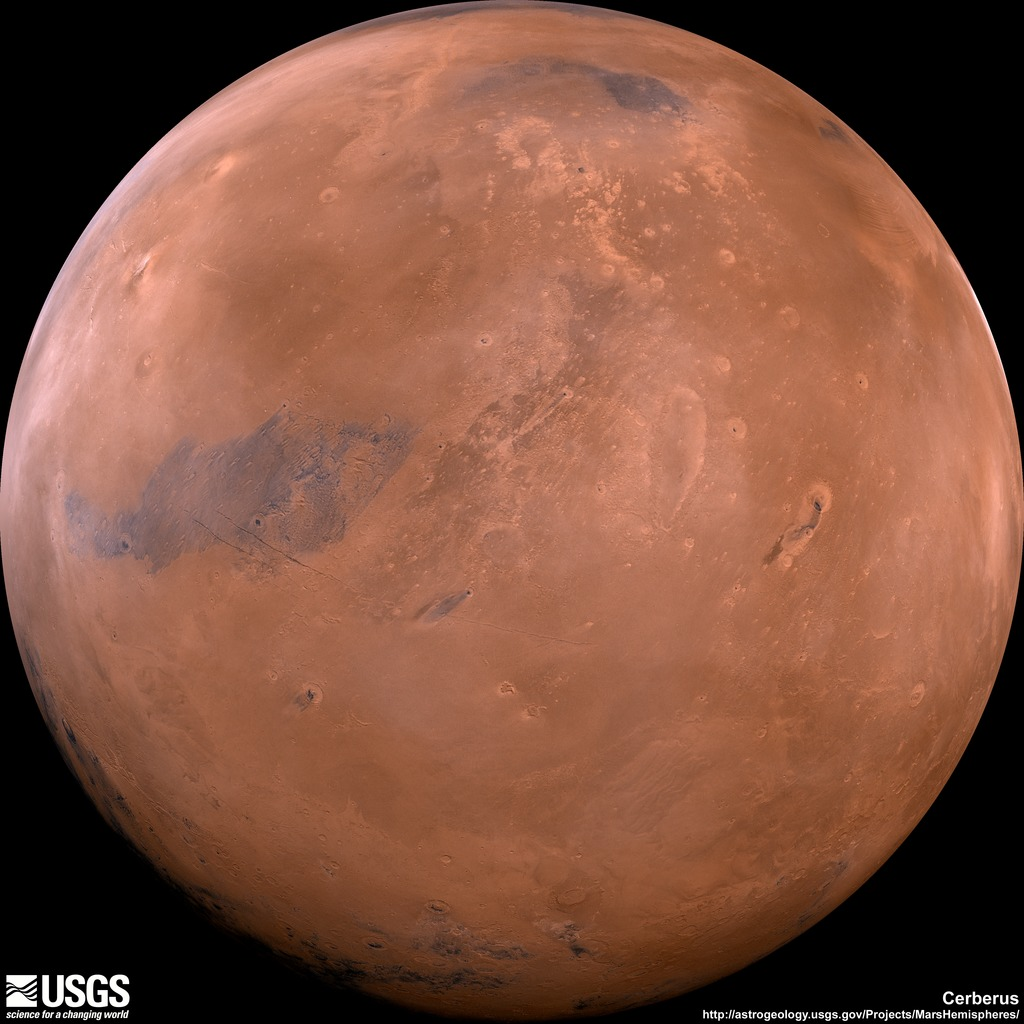

In [96]:

Image(filename='Cerberus Hemisphere Enhanced.png') 



# Schiaparelli Hemisphere Enhanced

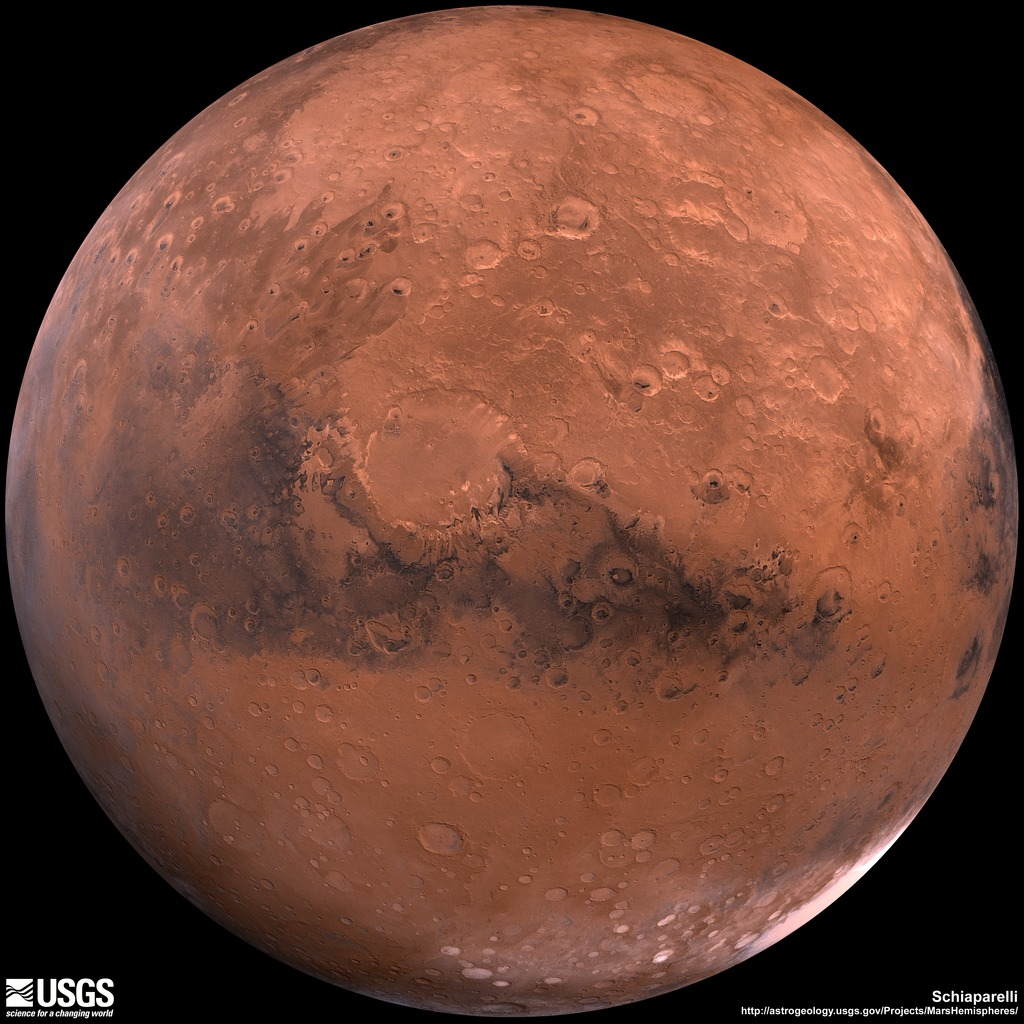

In [97]:

Image(filename='Schiaparelli Hemisphere Enhanced.png')



# Syrtis Major Hemisphere Enhanced

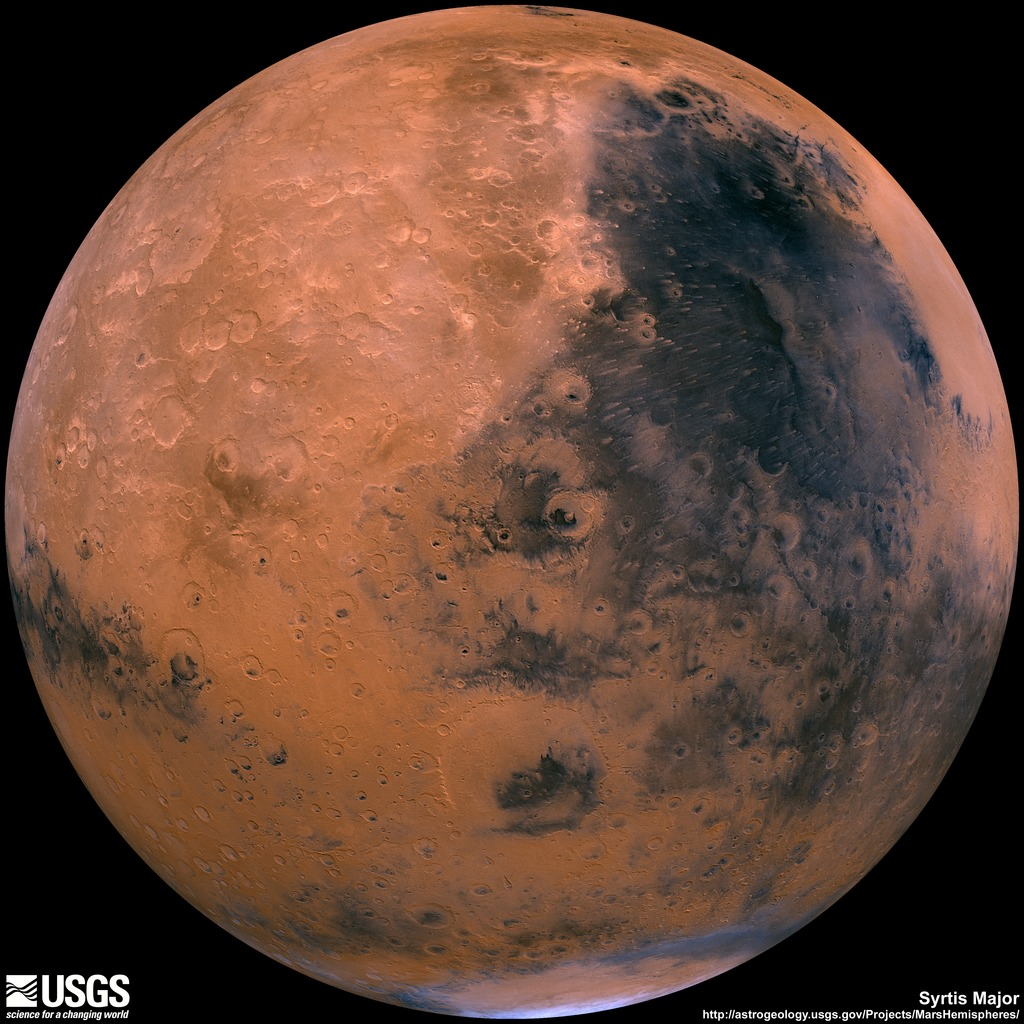

In [98]:

Image(filename='Syrtis Major Hemisphere Enhanced.png')



# Valles Marineris Hemisphere Enhanced

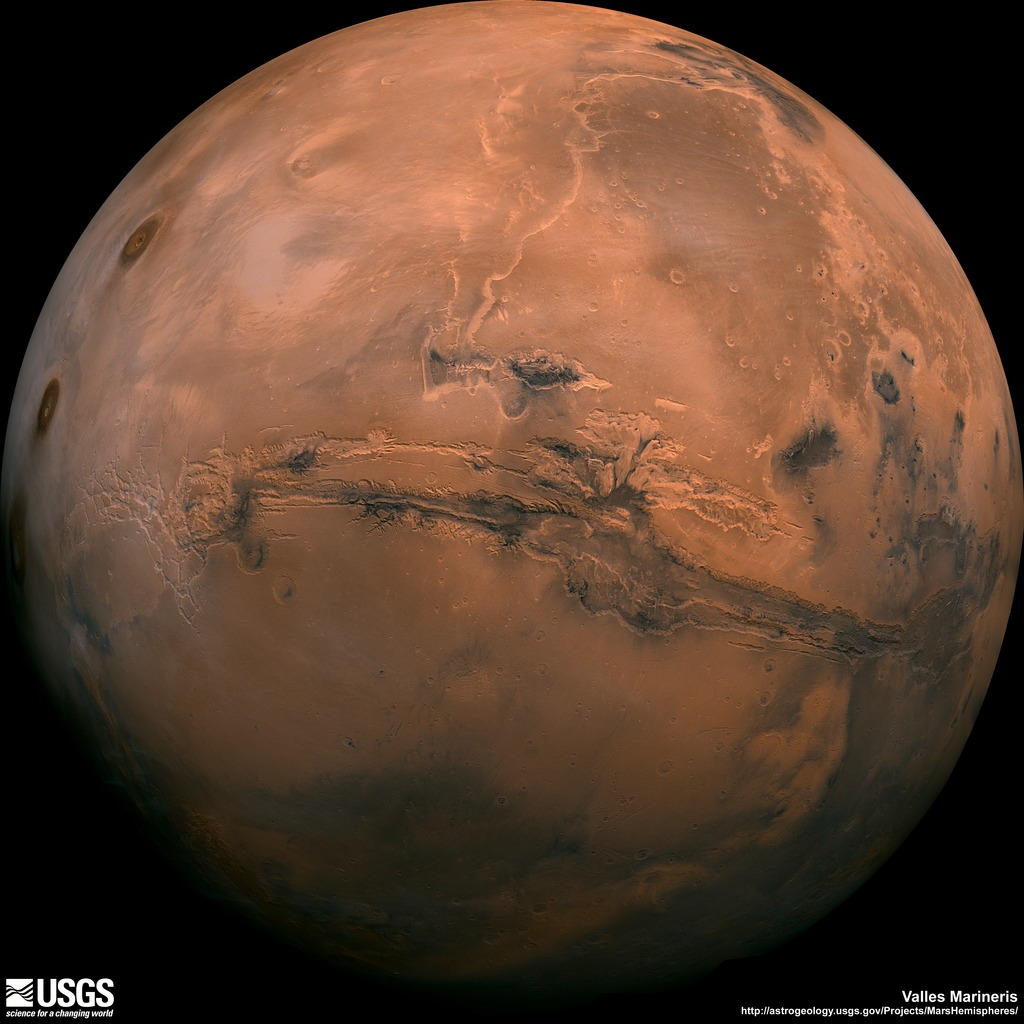

In [99]:

Image(filename='Valles Marineris Hemisphere Enhanced.png')

